<a href="https://colab.research.google.com/github/shubham2721/Case-Studies-Solution-and-Assignments/blob/main/Regex_and_Category_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regex Assignment**


In [ ]:
import pandas as pd
import numpy as np
import string
import re
from thefuzz import fuzz
from thefuzz import process

Q1) In the given product names, do the below changes: (Refer Data “Products_Practise_Exercise”). Write the answers in a dataframe with columns “Product Name”, “Singular/Plural Product Name”,”Best match Category” and “Levenshtein distance”.
1. Change product name from singular or plural 
2. Find best match category for the product (Refer Data “Categories_Practise_Exercise”) 
3. Find levenshtein distance between product name and the matched category

In [ ]:
df = pd.read_excel('/content/PRODUCT NAME.xlsx')

Finding the best match with Levenstein Similarity  

<b>levenstein_similarity(a,b)</b> = (|a| + |b| - levenstin_distance(a,b)) / (|a| + |b|)
					<br>		where a, b are strings


In [ ]:
# for i in range(len(df)):
#   print(df['Product Name'].apply(lambda x: fuzz.ratio(x, df['Category'][i])))
x = {}
required_list = []
for i in range(len(df)):
    for j in range(len(df)):
      k = fuzz.ratio(df['Product Name'][i], df['Category'][j])
      x[df['Category'][j]] = k  
    Keymax = max(zip(x.values(), x.keys()))[1]
    required_list.append(Keymax)
    x = {}
df['best match'] = required_list
df

,Product Name,Category,best match
0,Silk Saree,Kitchen Utensil,Saree
1,Utensil,Steel Valve,Kitchen Utensil
2,Steel Pipe,Tooth paste,Steel Valve
3,Computer Cable CAT 5,Canopies,Steel Valve
4,"Valve , material: Steel",Hammock,Valve
5,Hammock for garden,Planter,Hammock
6,Canopy,Cables,Canopies
7,Planter,Valve,Planter
8,Colgate Tooth paste,Saree,Tooth paste
9,Silk Fabric,Silk,Silk


In [ ]:
from Levenshtein import distance
req_dist = []
for i in range(len(df)):
    dist = distance(df['Product Name'][i], df['best match'][i]) 
    req_dist.append(dist)
df['Levenshtein Distance'] = req_dist
df

,Product Name,Category,best match,Levenshtein Distance
0,Silk Saree,Kitchen Utensil,Saree,5
1,Utensil,Steel Valve,Kitchen Utensil,8
2,Steel Pipe,Tooth paste,Steel Valve,4
3,Computer Cable CAT 5,Canopies,Steel Valve,16
4,"Valve , material: Steel",Hammock,Valve,18
5,Hammock for garden,Planter,Hammock,11
6,Canopy,Cables,Canopies,3
7,Planter,Valve,Planter,0
8,Colgate Tooth paste,Saree,Tooth paste,8
9,Silk Fabric,Silk,Silk,7


Q2)There are two dataframes given A & B, perform the below pandas functions on them: (Refer Data “A_Practise_Exercise” and “B_Practise_Exercise”)
1. Merge Two Datasets

In [ ]:
a = pd.read_excel('/content/A_Practise_Exercise.xlsx')
b = pd.read_excel('/content/B_Practise_Exercise.xlsx')

In [ ]:
print(a.columns, b.columns)

Index(['ID', 'Company Name'], dtype='object') Index(['ID', 'Engagement'], dtype='object')


In [ ]:
# Merging two columns on common column that is ID
df = pd.merge(a, b, on = 'ID')
df

,ID,Company Name,Engagement
0,1,Rose,Manufacturer
1,2,Lily,Dealer
2,3,Apple,Manufacturer
3,4,Orange,Wholesaler
4,5,House,Distributor
5,6,Building,Importer


Q3) In the given product names, write a function that performs each of the following: (Refer Data “Practise_Exercise_3”) 
1. Product Names that start with a vowel but do not end with a vowel 
2. Number of special characters in a product name 
3. Contains more than 3 consecutive numbers 
4. Contains the sequence “ble” and number of times. 
5. Find if product name ends/starts with category

In [ ]:
df = pd.read_excel('/content/new.xlsx')
df

,id,Product Name,Category
0,1,Angular Cutter,Cutter
1,2,Book Number 345789...!!!,Books
2,3,Call us 9000090000 for cough drops,Cough Drop
3,4,"Computer Cable, CAT5 Cable,,,",Cable
4,5,Portable Cabin - Easy to use.,Cabin
5,6,Fresh Vegetables,Food
6,7,Saree ***Item 46788,Apparel
7,8,""" Lux"" Baby Cream",Baby Care
8,9,Metal Pipe,Pipe
9,10,|Disposable Nurses Cap|,Nurse Uniform


In [ ]:
def string_cleaning(df):
  print("Product names that starts with vowel but does not end with it")
  print(list(df['Product Name'][df['Product Name'].str.contains('^[AEIOUaeiou]')
  & ~df['Product Name'].str.contains('[AEIOUaiou]$')]))
  print('----------------------------------------------------------')
  print("Count of Special Characters in Product Name")
  df['Special Characters Count'] = df["Product Name"].str.replace(' ','').apply(lambda p: sum( not q.isalnum() for q in p ))
  print(df[['Product Name','Special Characters Count']])
  print('----------------------------------------------------------')
  print("Contains more than 3 consecutive numbers")
  print(list(df['Product Name'][df['Product Name'].str.contains(r'\d{4}')]))
  print('----------------------------------------------------------')
  print('Number of total times Sequence ble contains in a product name')
  df['count ble'] = df['Product Name'].str.count('ble')
  print(df[['Product Name','count ble']])
  print('----------------------------------------------------------')
  print('if product name ends/starts with category')
  lst = []
  for i in range(len(df)):
    lst.append((df.iloc[i]['Product Name'].startswith(df.iloc[i]['Category'])) or (df.iloc[i]['Product Name'].endswith(df.iloc[i]['Category'])))
  df['Match'] = lst
  print(list(df['Product Name'][df['Match'] == True]))

In [ ]:
string_cleaning(df)

Product names that starts with vowel but does not end with it
['Angular Cutter']
----------------------------------------------------------
Count of Special Characters in Product Name
                          Product Name  Special Characters Count
0                       Angular Cutter                         0
1             Book Number 345789...!!!                         6
2  Call us 9000090000 for cough drops                          0
3        Computer Cable, CAT5 Cable,,,                         4
4        Portable Cabin - Easy to use.                         2
5                     Fresh Vegetables                         0
6                  Saree ***Item 46788                         3
7                    " Lux" Baby Cream                         2
8                           Metal Pipe                         0
9              |Disposable Nurses Cap|                         2
----------------------------------------------------------
Contains more than 3 consecutive numbers
[

Q4) From the given API, get the name and craft details in the form of a dictionary. Then write the dictionary in a dataframe with two columns named “Name” and “Craft”. (API: http://api.open- notify.org/astros.json)

In [ ]:
json = pd.read_json('http://api.open-notify.org/astros.json', typ = 'series')

In [ ]:
df = pd.DataFrame(json['people'])
df

,craft,name
0,ISS,Kjell Lindgren
1,ISS,Bob Hines
2,ISS,Samantha Cristoforetti
3,ISS,Jessica Watkins
4,Tiangong,Cai Xuzhe
5,Tiangong,Chen Dong
6,Tiangong,Liu Yang
7,ISS,Sergey Prokopyev
8,ISS,Dmitry Petelin
9,ISS,Frank Rubio


Q5) Split the given company names into three different files namely “A”, “B” and “C” as per the zone. For eg. File “A” will contain all companies in zone A. (Refer Data “Companies_Practice_Exercise”)

In [ ]:
df = pd.read_excel('/content/Companies_Practice_Exercise.xlsx')
df.sample(5)

,Company Name,Zone
11,gym,B
39,food,C
83,bros,B
89,properties,C
0,infotech,B


In [ ]:
# for segregating all the zones to three different files named as A.xlsx, B.xlsx, C.xlsx
for i in df['Zone'].unique():
  d_zone = df[df['Zone']== i].reset_index(drop =True)
  writer = pd.ExcelWriter(f'{i}.xlsx')
  # write dataframe to excel sheet named 'marks'
  d_zone.to_excel(writer, f'{i}')
  # save the excel file
  writer.save()

#Category Tree Assignment

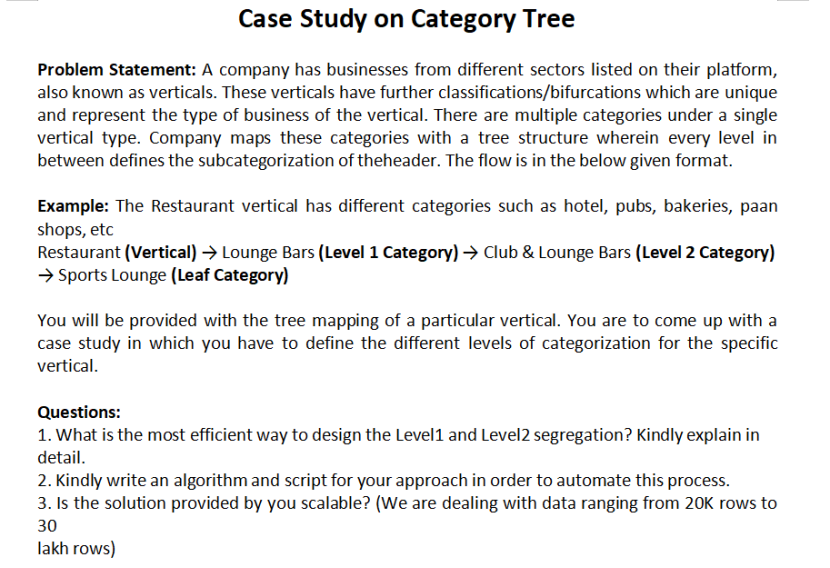

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/CATEGORY TREE.xlsx')

In [ ]:
data = df

In [ ]:
data['Vertical'].unique()

array(['Construction Product', 'Construction Services'], dtype=object)

**Drawing WordCloud for both the verticals to view the string with most number of occurences and to remove unnescessary one.**

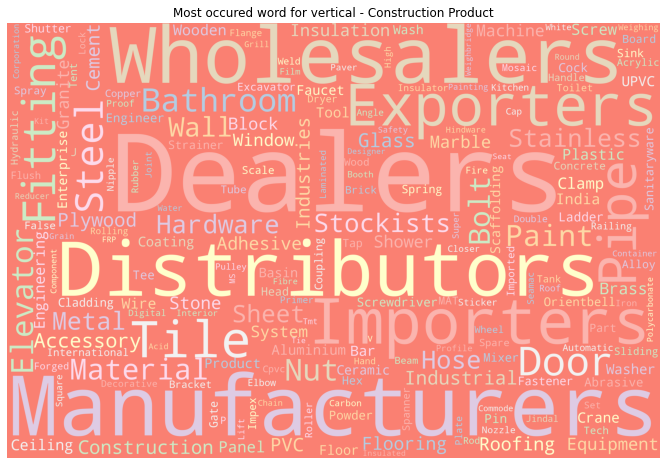

In [ ]:
new = data[data['Vertical'] == 'Construction Product'].copy()
#Creating the text variable
text = " ".join(cat for cat in new['Leaf Category'])
# Generate word cloud
word_cloud = WordCloud(
          width=3000,
          height=2000,
          random_state=1,
          background_color="salmon",
          colormap="Pastel1",
          collocations=False,
          stopwords=STOPWORDS,
          ).generate(text)

  # Display the generated Word Cloud
plt.figure(figsize = (15,8))
plt.title(f'Most occured word for vertical - Construction Product')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

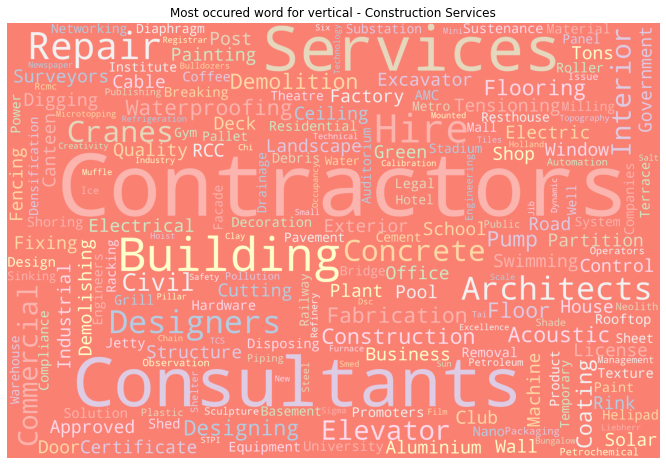

In [ ]:
new = data[data['Vertical'] == 'Construction Services'].copy()
#Creating the text variable
text = " ".join(cat for cat in new['Leaf Category'])
# Generate word cloud
word_cloud = WordCloud(
          width=3000,
          height=2000,
          random_state=1,
          background_color="salmon",
          colormap="Pastel1",
          collocations=False,
          stopwords=STOPWORDS,
          ).generate(text)

  # Display the generated Word Cloud
plt.figure(figsize = (15,8))
plt.title(f'Most occured word for vertical - Construction Services')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

**Program to Categorize LEVEL 1 and LEVEL 2 based on Leaf Category**

In [ ]:
for i in data['Vertical'].unique():
  new = data[data['Vertical'] == i].copy()
  # Removing some unnecesary words, white spaces and special character
  new['Leaf Category'].replace(to_replace=[r'[^A-Za-z]', r'For',r'And', r'On' ],
                                                    value=[' ','', ' ', ''], regex = True, inplace = True)
  new['Leaf Category'] = new['Leaf Category'].str.replace('(\s\w{1,2})\s|\s(\w{1,2}$)|(^\w{1,2})\s|^\s+|\s+$', '')
  new['Leaf Category'] = new['Leaf Category'].str.replace('^\s+|\s+$', '')
  new['splitted leaf category'] = new['Leaf Category'].str.split()

  # Explode is the function where the list of items will converted into the rows
  new  = new.explode('splitted leaf category')
  hghst_wrd_cnt = pd.DataFrame(new['splitted leaf category'].value_counts())
  hghst_wrd_cnt = hghst_wrd_cnt.cumsum().sort_values(by  = ['splitted leaf category'], ascending = False)

  # Assigning value to Level 1
  for j in hghst_wrd_cnt.index:
    data['Level 1 Category'][(data['Vertical'] == i) & (data['Leaf Category'].str.contains(j))] = j

  # Categorizng for Level 1 Category 
  for k in data['Level 1 Category'].unique():
    a = data[data['Level 1 Category'] == k]

    # Removing some unnecesary words, white spaces special character and the level 1 value
    a['Leaf Category'].replace(to_replace=[r'[^A-Za-z]', r'For',r'And', r'On', k ],
                                                    value=[' ','', ' ', '', ''], regex = True, inplace = True)
    a['Leaf Category'] = a['Leaf Category'].str.replace('(\s\w{1,2})\s|\s(\w{1,2}$)|(^\w{1,2})\s|^\s+|\s+$', '')
    a['Leaf Category'] = a['Leaf Category'].str.replace('^\s+|\s+$', '')
    a['Leaf Category'] = a['Leaf Category'].str.split()
    a = a.explode('Leaf Category')
    hghst_wrd_cnt_cat = pd.DataFrame(a['Leaf Category'].value_counts())
    hghst_wrd_cnt_cat = hghst_wrd_cnt_cat.cumsum().sort_values(by  = ['Leaf Category'], ascending = False)
    
    # Assigning value to Level 2 Categorization
    for l in hghst_wrd_cnt_cat.index:
      data['Level 2 Category'][(data['Vertical'] == i) & (data['Level 1 Category'] == k) & (data['Leaf Category'].str.contains(l))] = l

**Saving the output file**


In [ ]:
from tables import index
data.to_csv('output.csv', index = False)